# KNN 분류 - 피마 인디언 당뇨병 데이터 셋

## #01. 준비작업

### [1] 패키지 가져오기

In [15]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import pandas as pd

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/pima_indians_diabetes.xlsx", categories=['Outcome'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB
None

데이터프레임 상위 5개 행
+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   

## #02. 데이터 전처리

### [1] 이전 예제에서 수립한 전처리 전략 재현

1. `0`값을 포함해서는 안되는 변수에 대해 평균으로 대체

#### (1) 정제 대상 필드명

In [3]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']                

#### (2) `0`값을 결측치로 대체후 평균으로 다시 치환

In [4]:
df = origin.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)
df2 = my_replace_missing_value(df)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [9]:
df2.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int32
dtype: object

#### (3) 결과 확인

In [5]:
total_count= len(origin)

for feature in zero_features:
    zero_count = origin[origin[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))
    
print("---" * 30)

for feature in zero_features:
    zero_count = df2[df2[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %
------------------------------------------------------------------------------------------
Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


## #03. KNN 분류 적용

### [1] 훈련, 검증 데이터 분리

In [6]:
df2['Outcome'] = df2['Outcome'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df2, yname = 'Outcome', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### [2] 분류 알고리즘 적용

[교차검증]
+----+-------------+---------------+-----+-----------+-------------------+
|    | algorithm   |   n_neighbors |   p | weights   |   mean_test_score |
|----+-------------+---------------+-----+-----------+-------------------|
| 29 | brute       |             5 |   1 | distance  |          0.728055 |
| 17 | kd_tree     |             5 |   1 | distance  |          0.728055 |
|  5 | ball_tree   |             5 |   1 | distance  |          0.728055 |
|  9 | ball_tree   |             7 |   1 | distance  |          0.726469 |
| 33 | brute       |             7 |   1 | distance  |          0.726469 |
| 21 | kd_tree     |             7 |   1 | distance  |          0.726469 |
|  4 | ball_tree   |             5 |   1 | uniform   |          0.723151 |
| 16 | kd_tree     |             5 |   1 | uniform   |          0.723151 |
| 28 | brute       |             5 |   1 | uniform   |          0.723151 |
| 20 | kd_tree     |             7 |   1 | uniform   |          0.721551 |
|  8 | ball_tree  

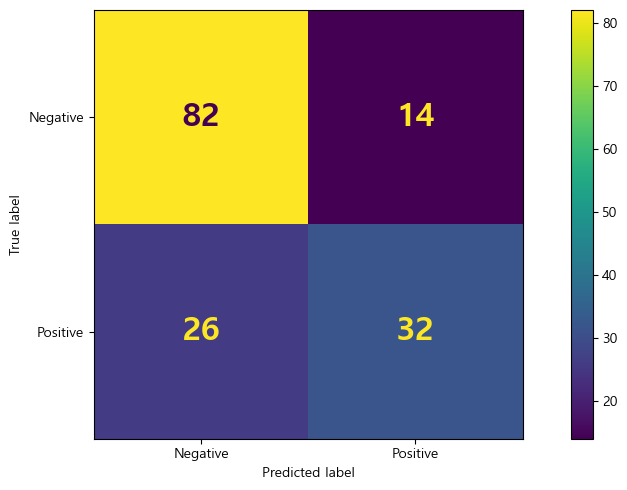

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


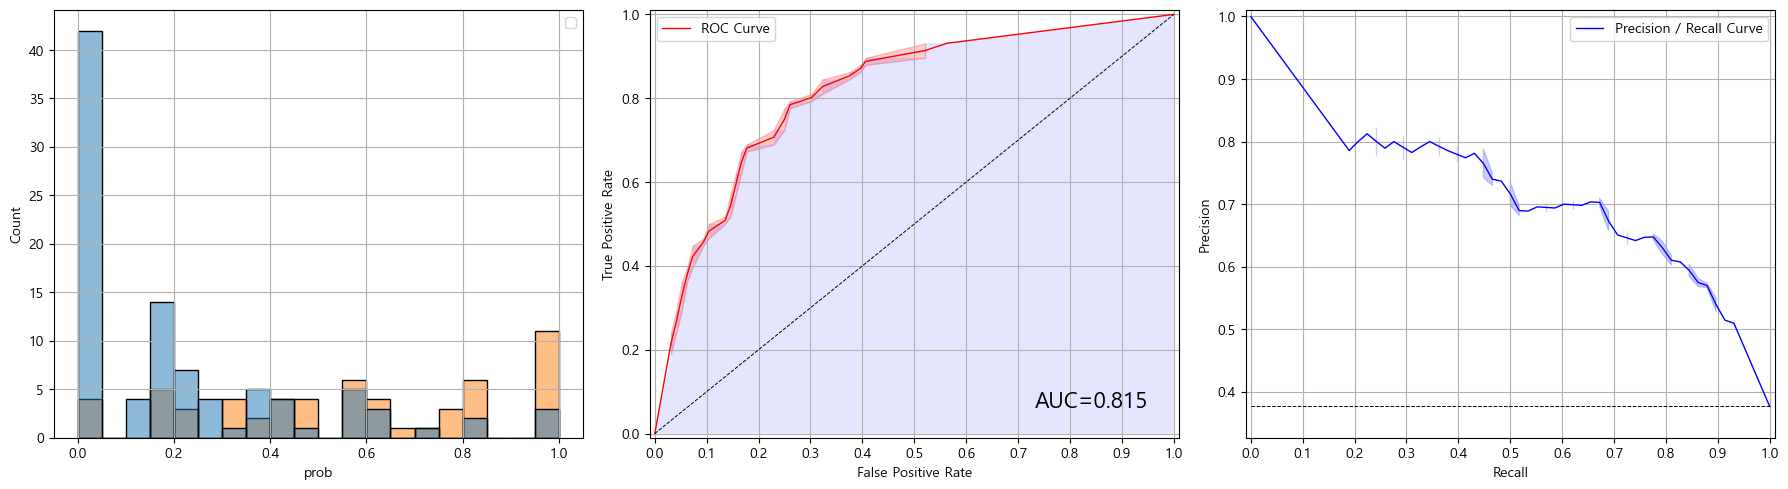


[학습곡선]


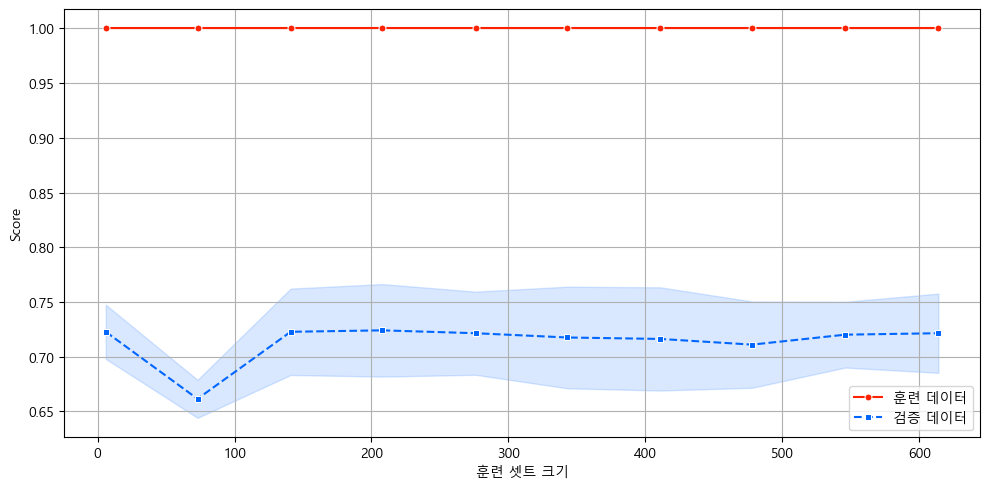

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, p=1, weights='distance')

In [7]:
my_knn_classification(x_train,y_train, x_test, y_test)

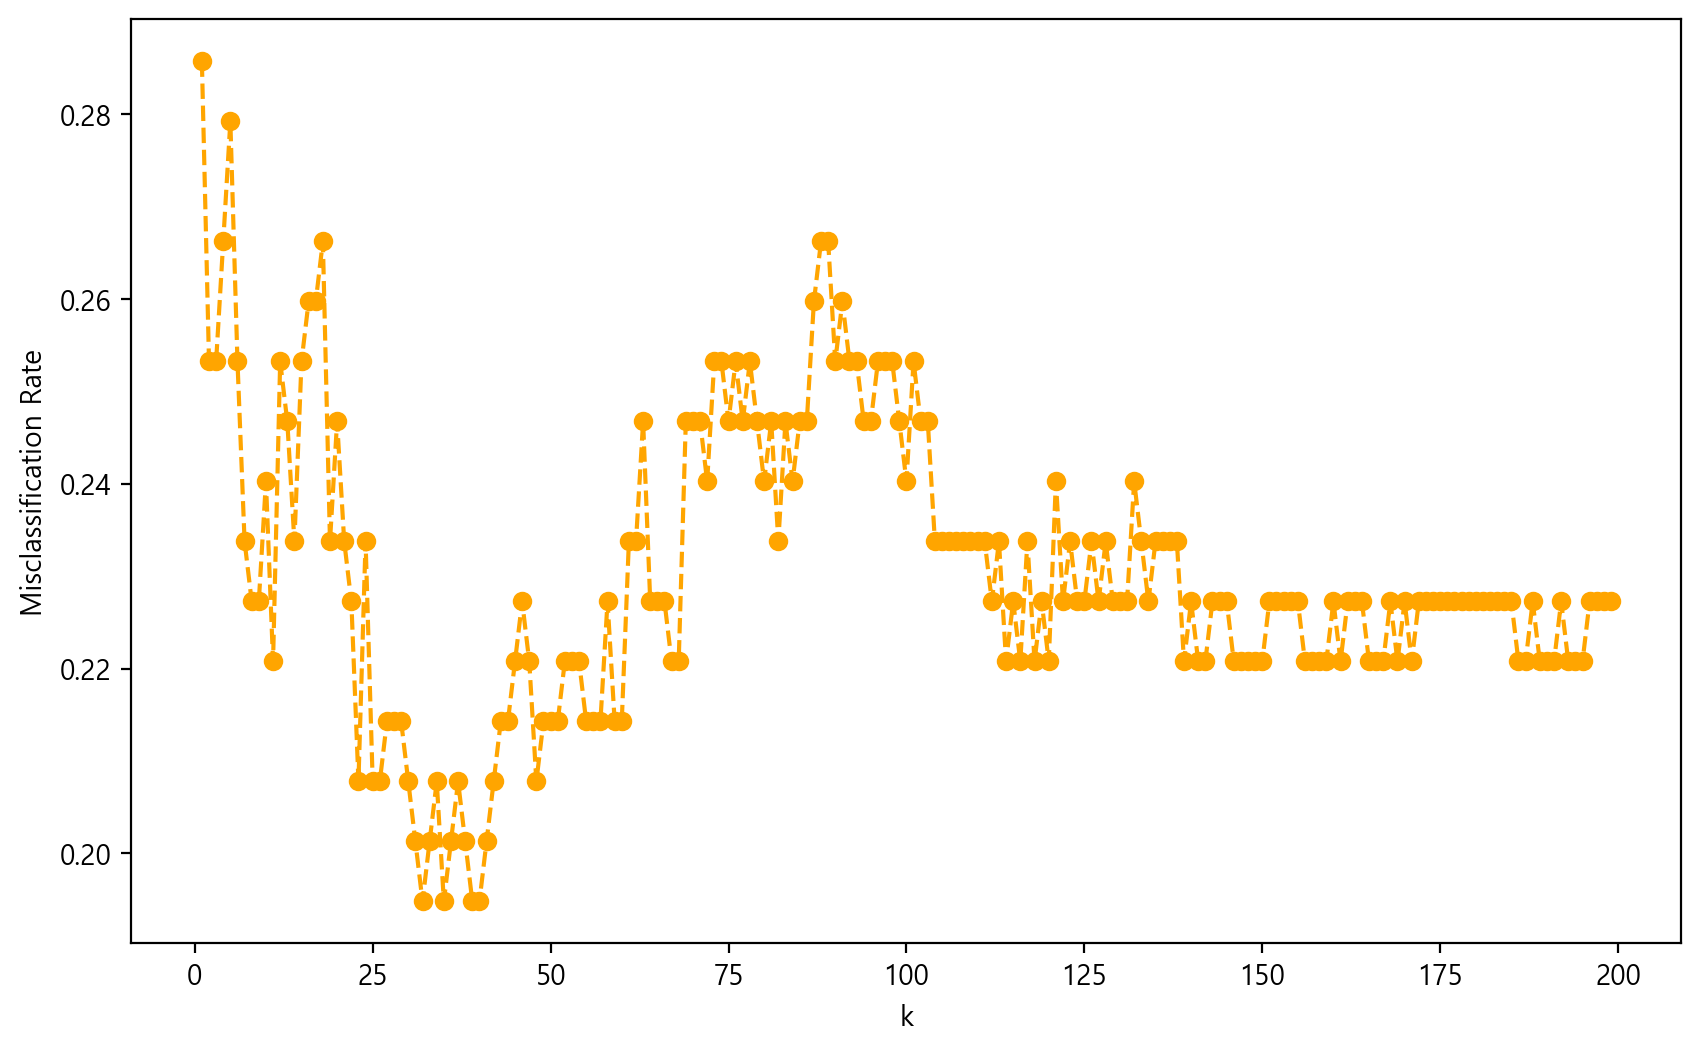

In [8]:
k_num = range(1,200)
box = []

for k in k_num:
    k_num1 = KNeighborsClassifier(n_neighbors=k, weights='uniform',n_jobs=-1)
    k_num1.fit(x_train, y_train)
    box.append(1-k_num1.score(x_test,y_test))
    
plt.plot(k_num, box,'o--', color='orange')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.show()
plt.close()

In [11]:
# 표준화하고 다시 수행하기
ndf = df2.copy()
std_ndf = my_standard_scaler(ndf, 'Outcome')
std_ndf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


In [12]:
std_ndf['Outcome'] = std_ndf['Outcome'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(std_ndf, yname = 'Outcome', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

[교차검증]
+----+-------------+---------------+-----+-----------+-------------------+
|    | algorithm   |   n_neighbors |   p | weights   |   mean_test_score |
|----+-------------+---------------+-----+-----------+-------------------|
| 33 | brute       |             7 |   1 | distance  |          0.745995 |
| 21 | kd_tree     |             7 |   1 | distance  |          0.745995 |
|  9 | ball_tree   |             7 |   1 | distance  |          0.745995 |
| 32 | brute       |             7 |   1 | uniform   |          0.744356 |
| 20 | kd_tree     |             7 |   1 | uniform   |          0.744356 |
|  8 | ball_tree   |             7 |   1 | uniform   |          0.744356 |
|  2 | ball_tree   |             3 |   2 | uniform   |          0.739518 |
| 14 | kd_tree     |             3 |   2 | uniform   |          0.739518 |
| 26 | brute       |             3 |   2 | uniform   |          0.739518 |
| 30 | brute       |             5 |   2 | uniform   |          0.739491 |
| 18 | kd_tree    

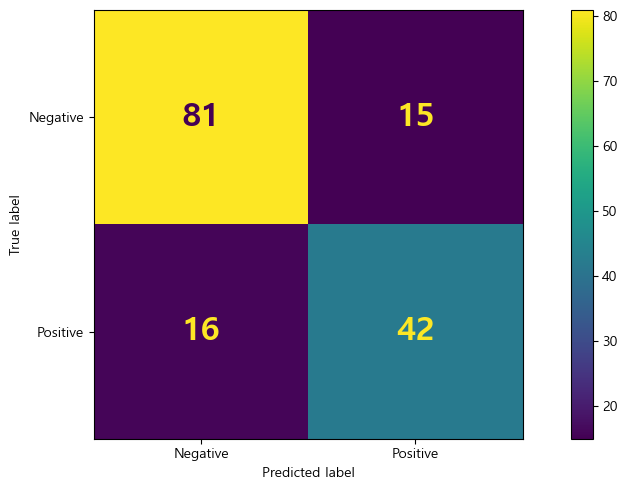

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


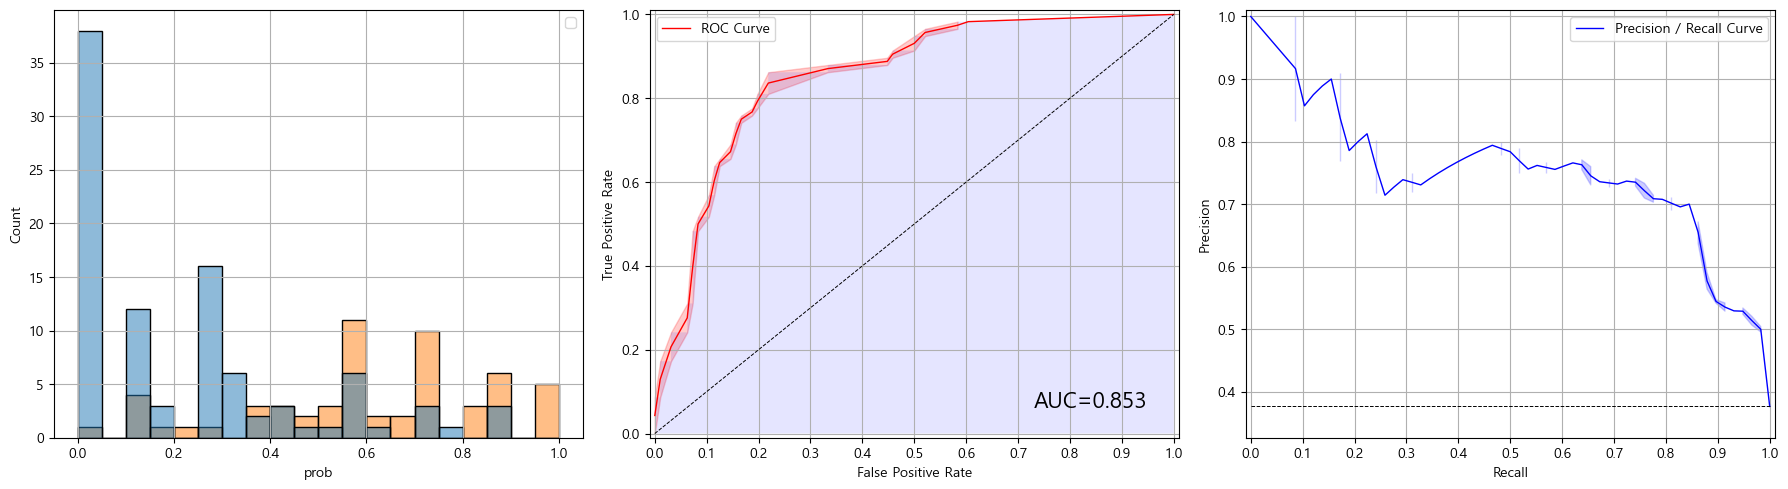


[학습곡선]


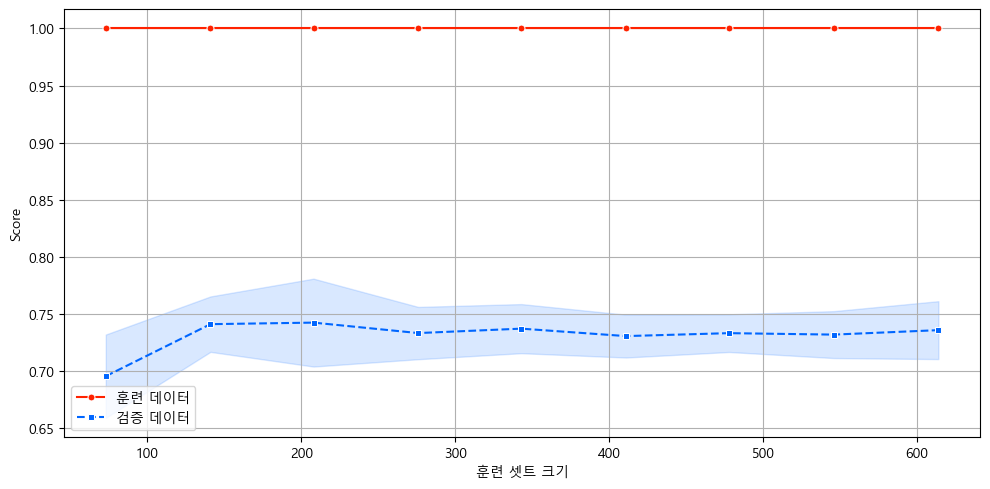

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=7, p=1,
                     weights='distance')

In [13]:
my_knn_classification(x_train,y_train, x_test, y_test)

In [16]:
# 결정경계선 시각화를 위한 차원축소

# 주성분 개수 설정(2개)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_test)

df_pca = pd.DataFrame(data=df_pca, columns=['C1', 'C2'])
df_pca.head()

,C1,C2
0,1.975762,-1.115212
1,-0.356315,-1.068693
2,1.034432,-0.712753
3,-2.042916,-0.235037
4,-0.805664,1.984095


In [20]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,-0.250952,-0.219843,-0.529859,1.120812e+00,-1.829940e-01,0.821249,-0.972105,-0.445935
313,-0.250952,-0.285597,-1.853434,-2.180187e+00,-8.303138e-01,-0.430447,0.465472,-0.701198
195,0.342981,1.193881,0.959163,1.348468e+00,6.408675e-01,1.010459,-0.232176,-0.360847
570,-0.250952,-1.436303,-0.198965,8.087936e-16,-3.345079e-16,0.006191,-0.609690,0.490030
226,-1.141852,-0.680125,0.297376,8.087936e-16,-3.345079e-16,0.471939,-0.827139,-0.616111
